# Tabu Search Experiment

In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import time

sys.path.append(os.path.abspath("../.."))

from src.utils import plot_graph, plot_colored_graph, loading_graphs

from src.tabu_search import tabu_search


Running Tabu Search on Small Dataset
Small Graph Loaded
Nodes: 11
Edges: 20


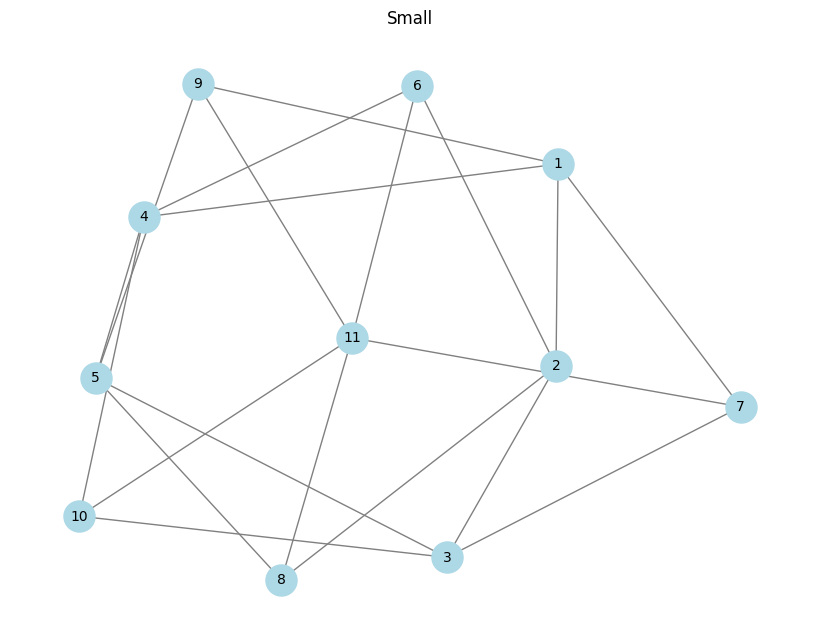

 Tabu Size  Fitness  Conflicts  Colors     Time
        10        4          0       4 0.414128
        30        4          0       4 0.405915
        70        4          0       4 0.406530


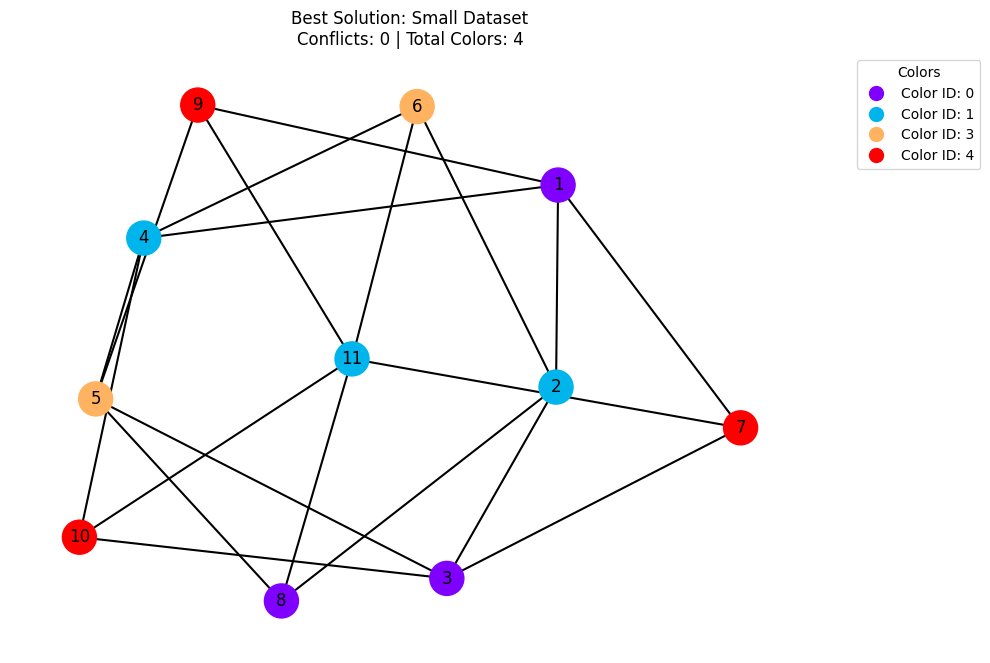

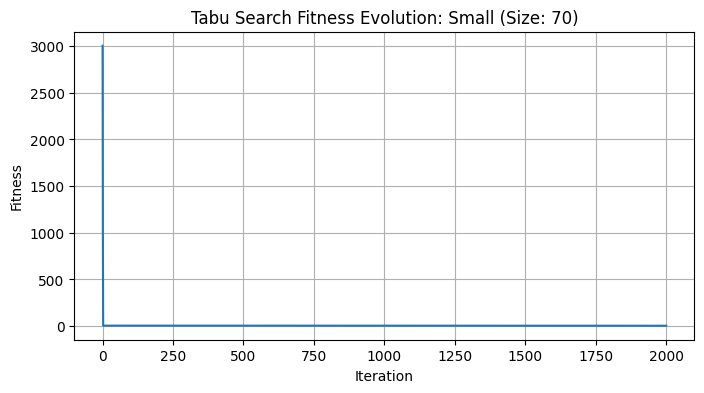


Running Tabu Search on Medium Dataset
Medium Graph Loaded
Nodes: 81
Edges: 1056


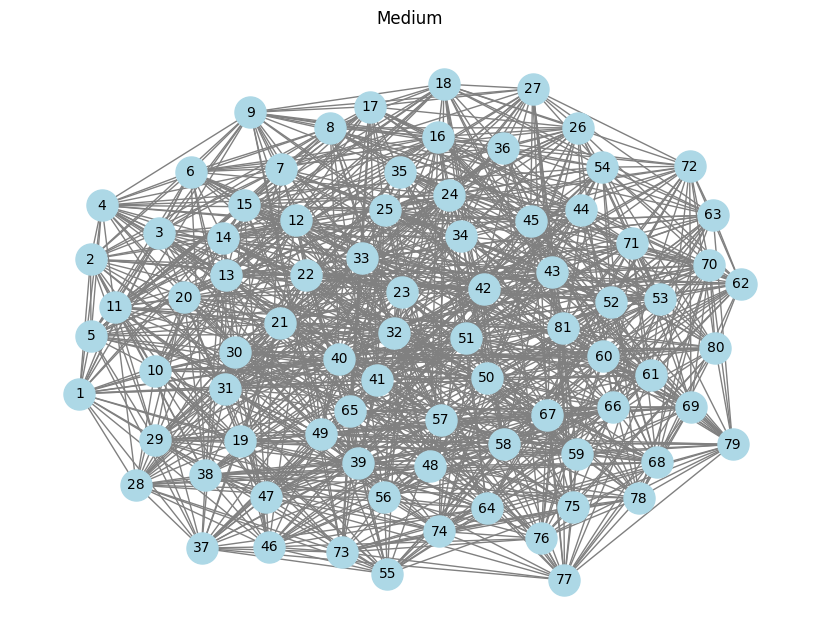

 Tabu Size  Fitness  Conflicts  Colors     Time
        10       14          0      14 0.548780
        30     1014          1      14 0.575892
        70       14          0      14 0.549392


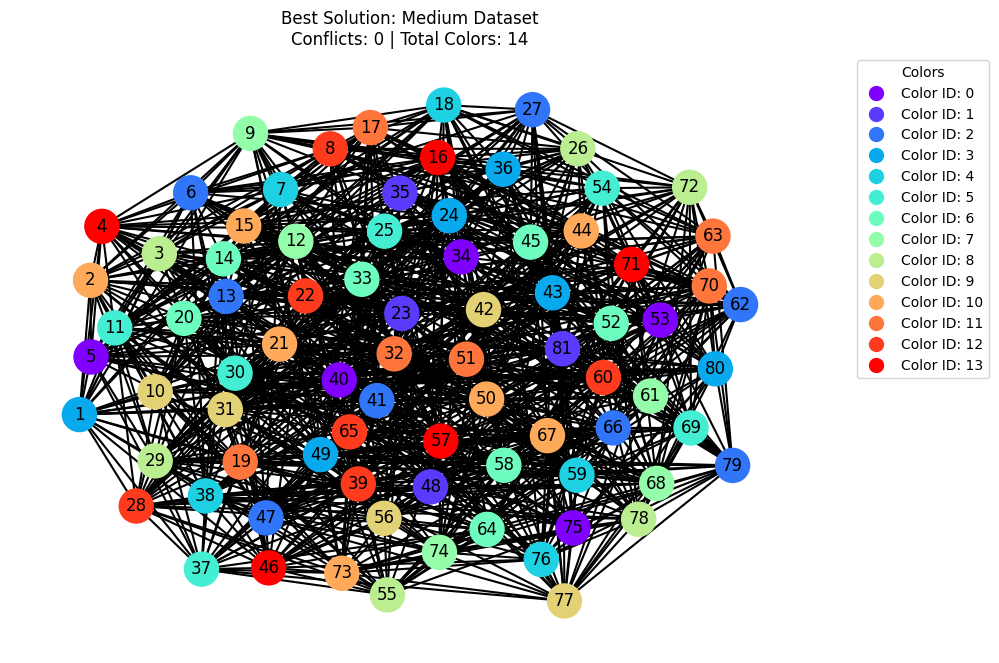

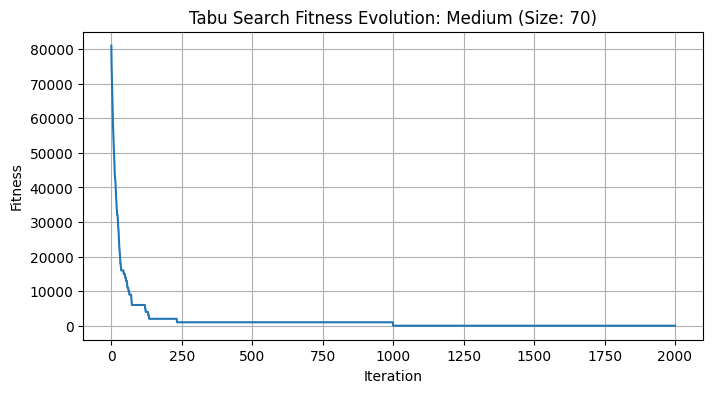


Running Tabu Search on Large Dataset
Large Graph Loaded
Nodes: 450
Edges: 8169


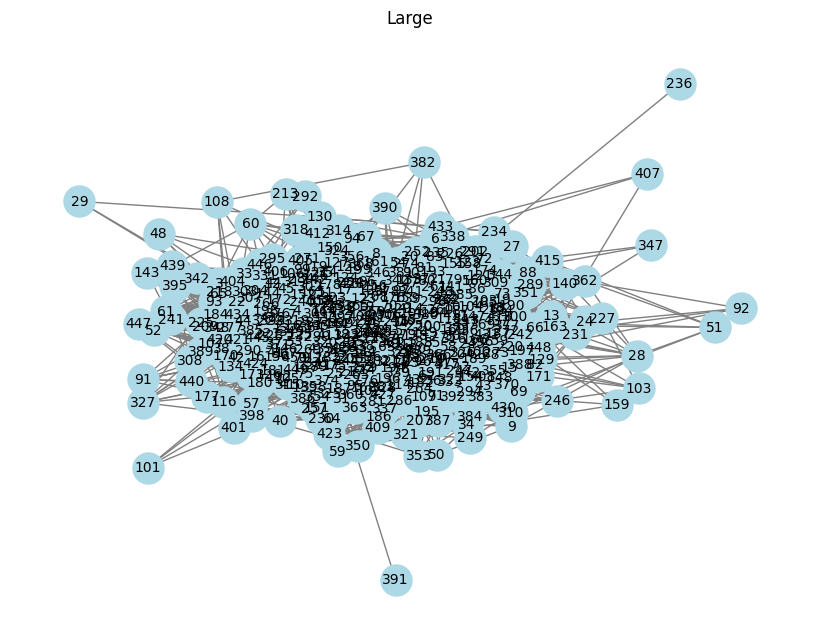

 Tabu Size  Fitness  Conflicts  Colors     Time
        10     5022          5      22 1.378662
        30     5022          5      22 1.380727
        70     1022          1      22 1.421096


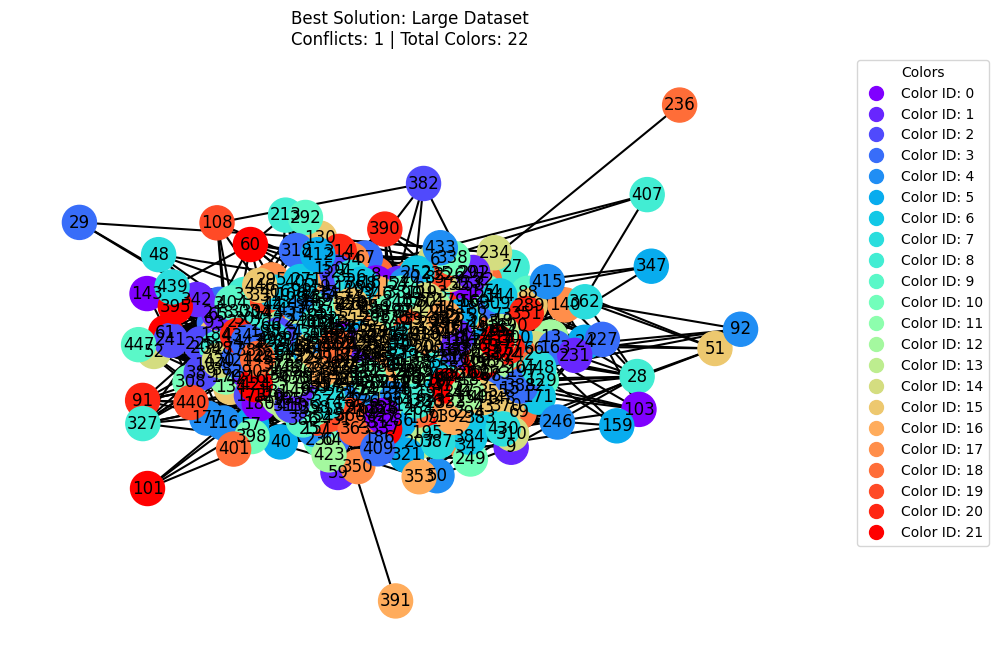

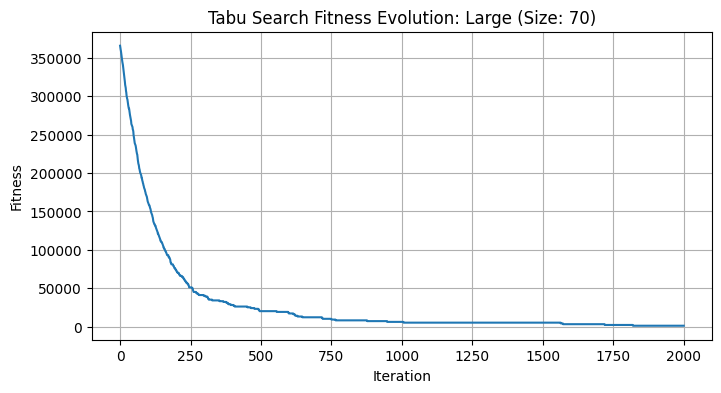

In [2]:
datasets = [
    ("../../data/myciel3.col.txt", "Small"),
    ("../../data/queen9_9.col.txt", "Medium"),
    ("../../data/le450_15b.col.txt", "Large")
]

tabu_sizes = [10, 30, 70]

for dataset_path, size_name in datasets:
    print(f"\nRunning Tabu Search on {size_name} Dataset")
    graph = loading_graphs(dataset_path, size=size_name)
    plot_graph(graph, title=size_name)
    
    results_table = []
    best_overall = None
    best_history = None

    for t_size in tabu_sizes:
        if size_name == "Small":
            max_colors_limit = 5     
        elif size_name == "Medium":
            max_colors_limit = 14
        elif size_name == "Large":
            max_colors_limit = 22
        
        start_time = time.time()
        best_ind, history = tabu_search(
            graph, 
            max_colors=max_colors_limit, 
            tabu_size=t_size, 
            max_iters=2000, 
            neighbor_size=20
        )
        end_time = time.time()
        duration = end_time - start_time
        
        results_table.append({
            "Tabu Size": t_size,
            "Fitness": best_ind.fitness,
            "Conflicts": best_ind.conflicts,
            "Colors": best_ind.num_colors_used(),
            "Time": duration
        })

        if best_overall is None or best_ind.fitness < best_overall.fitness:
            best_overall = best_ind
            best_history = history

    df = pd.DataFrame(results_table)
    print(df.to_string(index=False))

    if best_overall:
        plot_colored_graph(graph, best_overall, title=f"Best Solution: {size_name} Dataset")

        plt.figure(figsize=(8, 4))
        plt.plot(best_history)
        plt.title(f"Tabu Search Fitness Evolution: {size_name} (Size: {t_size})")
        plt.xlabel("Iteration")
        plt.ylabel("Fitness")
        plt.grid(True)
        plt.show()